# Convert Sound Array to Time Series and Spectrogram of a Folder
This script converts sound of all files inside a foler to a time series plot and spectrogram.

In [1]:
import sys
import soundfile as sf
sys.path.insert(0, '/Users/omkarpatil/Documents/GitHub/event_based_visual_microphone/utilities/')
import utility_spectrogram as utility

<span style="color:red"> Provide the audio files sampling rate, file path and title describing the audio bellow: </span>

In [2]:
audio_samplerate = 2000
audio_filepath = '/Volumes/Omkar 5T/dataset/haoqi_events_audio/video_100.wav'
audio_folderpath = '/Volumes/Omkar 5T/dataset/haoqi_highest/audio/video_100/'

The code bellow converts the provided audio array to a spectrogram by first finding its STFT.

In [3]:
utility.compare_spectrograms_metrics(audio_folderpath, audio_filepath)


Ranked Results:
Rank 1: roi_496.wav
  Log-Spectral Distance: 10.62746810913086
  Cross-Correlation: 17282726.0
  DTW Distance: 13753.32345724518

Rank 2: roi_495.wav
  Log-Spectral Distance: 10.954361915588379
  Cross-Correlation: 17363232.0
  DTW Distance: 14321.790985940042

Rank 3: roi_497.wav
  Log-Spectral Distance: 12.110431671142578
  Cross-Correlation: 16566454.0
  DTW Distance: 15476.058454434855

Rank 4: roi_498.wav
  Log-Spectral Distance: 13.173985481262207
  Cross-Correlation: 15838608.0
  DTW Distance: 16597.942440635645

Rank 5: roi_499.wav
  Log-Spectral Distance: 13.357383728027344
  Cross-Correlation: 16126268.0
  DTW Distance: 16677.442951730205



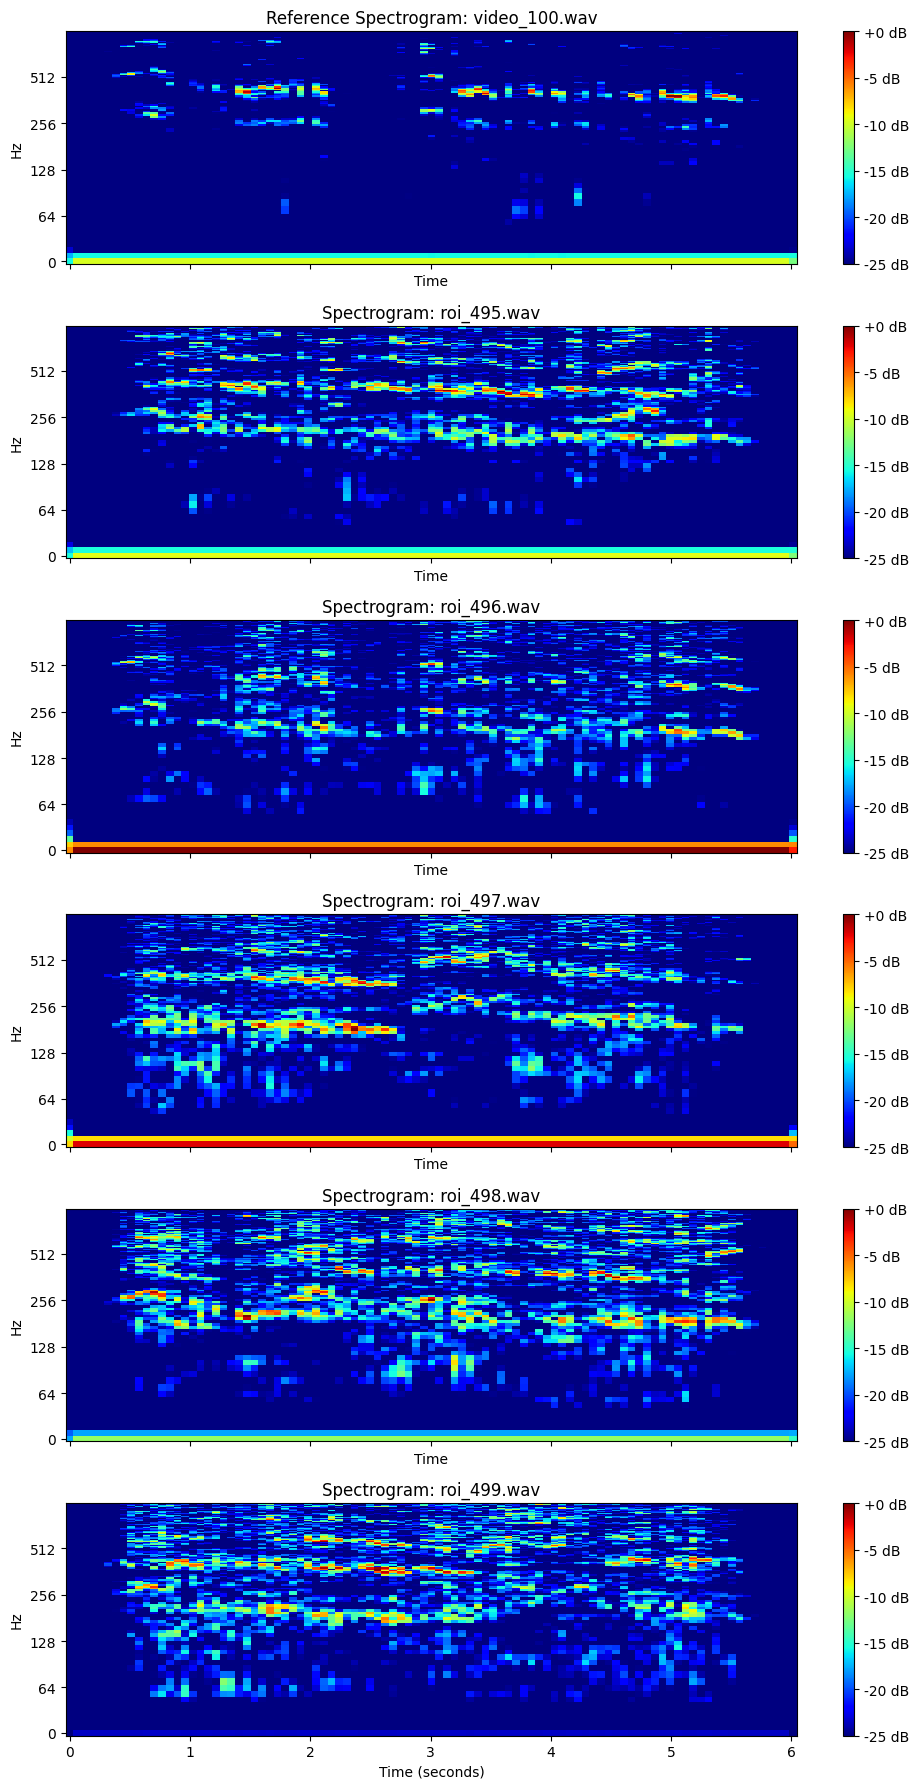

In [4]:
n_fft = 256
hop_length = 128

audio, _ = sf.read(audio_filepath)
utility.compare_spectrograms(audio_filepath, audio_folderpath)

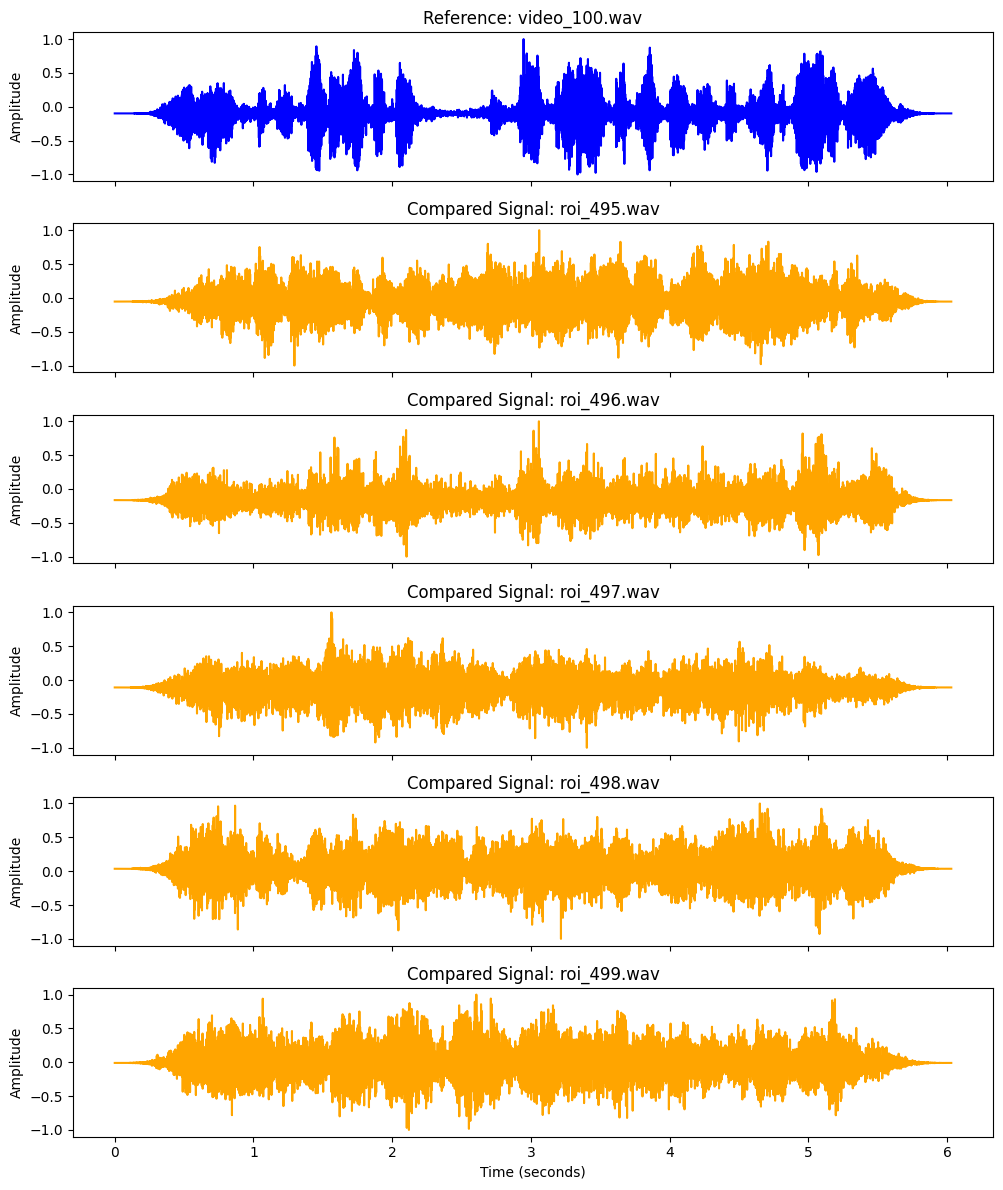

In [5]:
utility.compare_signals(audio_filepath, audio_folderpath)

In [16]:
import numpy as np
path = [f'video_{int.astype(np.int16)}' for int in np.arange(1, 101, 1)]
parent_folder = [f'/Volumes/Omkar 5T/dataset/haoqi_lowest/audio/{file_name}/' for file_name in path]
reference_file = [f'/Volumes/Omkar 5T/dataset/haoqi_events_audio/{file_name}.wav' for file_name in path]

worst_files = []
for folder, file in zip(parent_folder, reference_file):
    worst_files_list = utility.compare_spectrograms_across_videos(folder, file)
    print(worst_files_list[0])
    worst_files.extend(worst_files_list[0])
print(worst_files)

Processing /Volumes/Omkar 5T/dataset/haoqi_lowest/audio/video_1/...
Processing file: roi_0.wav
Processing file: roi_1.wav
Processing file: roi_2.wav
Processing file: roi_3.wav
Processing file: roi_4.wav
['roi_0', 'roi_1']
Processing /Volumes/Omkar 5T/dataset/haoqi_lowest/audio/video_2/...
Processing file: roi_5.wav
Processing file: roi_6.wav
Processing file: roi_7.wav
Processing file: roi_8.wav
Processing file: roi_9.wav
['roi_9', 'roi_8']
Processing /Volumes/Omkar 5T/dataset/haoqi_lowest/audio/video_3/...
Processing file: roi_10.wav
Processing file: roi_11.wav
Processing file: roi_12.wav
Processing file: roi_13.wav
Processing file: roi_14.wav
['roi_14', 'roi_10']
Processing /Volumes/Omkar 5T/dataset/haoqi_lowest/audio/video_4/...
Processing file: roi_15.wav
Processing file: roi_16.wav
Processing file: roi_17.wav
Processing file: roi_18.wav
Processing file: roi_19.wav
['roi_15', 'roi_18']
Processing /Volumes/Omkar 5T/dataset/haoqi_lowest/audio/video_5/...
Processing file: roi_20.wav
Pr

In [7]:
import os
source_dir = '/Volumes/Omkar 5T/dataset/haoqi_highest/'
destination_dir = '/Users/omkarpatil/OneDrive - Delft University of Technology/personal_project/good/'

source_files = {file for file in os.listdir(source_dir) if file.endswith('.mp4')}
destination_files = {file for file in os.listdir(destination_dir) if file.endswith('.mp4')}

not_copied_files = source_files - destination_files
not_copied_files = [files.split('.')[0] for files in not_copied_files]
print(not_copied_files)

['roi_457', 'roi_335', 'roi_306', 'roi_415', 'roi_111', 'roi_274', 'roi_440', 'roi_173', 'roi_486', 'roi_266', 'roi_367', 'roi_188', 'roi_126', 'roi_291', 'roi_319', 'roi_73', 'roi_445', 'roi_214', 'roi_405', 'roi_95', 'roi_54', 'roi_378', 'roi_311', 'roi_0', 'roi_333', 'roi_243', 'roi_294', 'roi_6', 'roi_55', 'roi_85', 'roi_35', 'roi_36', 'roi_145', 'roi_107', 'roi_287', 'roi_273', 'roi_203', 'roi_408', 'roi_23', 'roi_234', 'roi_444', 'roi_451', 'roi_410', 'roi_369', 'roi_150', 'roi_233', 'roi_499', 'roi_79', 'roi_133', 'roi_94', 'roi_272', 'roi_286', 'roi_123', 'roi_442', 'roi_61', 'roi_81', 'roi_247', 'roi_497', 'roi_246', 'roi_72', 'roi_355', 'roi_44', 'roi_345', 'roi_153', 'roi_340', 'roi_248', 'roi_479', 'roi_66', 'roi_329', 'roi_190', 'roi_143', 'roi_371', 'roi_469', 'roi_298', 'roi_212', 'roi_240', 'roi_225', 'roi_470', 'roi_422', 'roi_365', 'roi_10', 'roi_316', 'roi_181', 'roi_461', 'roi_350', 'roi_351', 'roi_197', 'roi_223', 'roi_164', 'roi_183', 'roi_238', 'roi_175', 'roi_36

In [8]:
def intersection_of_lists(list1, list2):
    # Convert both lists to sets and find the intersection
    return list(set(list1) & set(list2))
common_elements = sorted(intersection_of_lists(worst_files, not_copied_files))
common_elements = [f'{source_dir}{elem}.mp4' for elem in common_elements]
print(common_elements)
print(len(common_elements))

['/Volumes/Omkar 5T/dataset/haoqi_highest/roi_0.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_101.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_102.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_106.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_108.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_11.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_111.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_114.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_116.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_119.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_121.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_122.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_126.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_127.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_132.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_134.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_138.mp4', '/Volumes/Omkar 5T/dataset/haoqi_highest/roi_139.mp4', '/Volumes/Om

In [17]:
source_dir = '/Volumes/Omkar 5T/dataset/haoqi_lowest/'
worst_files = [f'{source_dir}{file}.mp4' for file in worst_files]
print(worst_files)
direc_dir = '/Users/omkarpatil/OneDrive - Delft University of Technology/personal_project/bad/'
utility.copy_files_to_folder(worst_files, direc_dir)

['/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_0.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_1.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_9.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_8.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_14.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_10.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_15.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_18.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_20.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_24.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_28.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_25.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_33.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_30.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_35.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_37.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_40.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_42.mp4', '/Volumes/Omkar 5T/dataset/haoqi_lowest/roi_49.mp